### C'est quoi la technique recente?

<div class="alert alert-info">
           <h1 style="font-size:25px;"><strong>Projet 6</strong></h1>
           <h1 style="font-size:25px;"><strong>Classifiez automatiquement des biens de consommation</strong></h1>
</div>

<div class="alert alert-info">
           <h1 style="font-size:25px;"><strong>Notebook technique recente</strong></h1>
</div>

## <font color="#00afe6">Sommaire</font>                                                                             

[Imports, Chargemernts et connaisance de données. ](#section_A)                                                           
[1.0 Transfer Learning VGG16 Imagenet](#section_1)                                                                        
[2.0 Approche combinée NLP](#section_2)                                                                         
[2.1 Homogénisation des dimensions](#section_2_1)                                                          
[2.2 Assemblage des données](#section_2_2)                                                                
[2.3 Catégorisation](#section_2_3)                                                                         
[3.0 Représentation des données](#section_3)                                                                               
[4.0 Liens importants](#section_4)                                                                      

<div class="alert alert-info">
    <font id="section_A">
        <h1 style="font-size:25px;"><strong>Imports, Configuration, Versions, Chargements et connaisance de données, Check memory. </strong></h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #opencv pour SIFT

import sys
import IPython as ip
import statsmodels as stat
import time
import datetime

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [5]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
#from keras.preprocessing.image import load_img, img_to_array
#from keras.applications.vgg16 import preprocess_input
#from keras.applications.vgg16 import VGG16

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Activation
from keras.models import clone_model

In [7]:
from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
from IPython.display import Image

In [8]:
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL

import time

In [9]:
# Enregistrer le temps de début
début = time.time()

In [10]:
# Versions
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('Sklearn       : ' + sklearn.__version__)
print('Geopandas     : ' + sns.__version__)
print('IPython       : ' + ip.__version__)
print('statsmodels   : ' + stat.__version__)


now = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

Version des librairies utilisées :
Python        : 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]
NumPy         : 1.21.5
Pandas        : 1.3.5
Matplotlib    : 3.5.3
Seaborn       : 0.12.2
Sklearn       : 1.0.2
Geopandas     : 0.12.2
IPython       : 7.31.1
statsmodels   : 0.13.5
Lancé le      : 2023-07-21T11:52:37.590609


In [11]:
#configuration
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 70)
pd.set_option('display.precision', 5)
pd.set_option("max_colwidth", 80) 

# Check memory

In [12]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
pd.DataFrame(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True))

,0,1
0,Activation,1056
1,AgglomerativeClustering,1056
2,Conv2D,1056
3,CountVectorizer,1056
4,DBSCAN,1056
5,Dense,1056
6,Flatten,1056
7,GridSearchCV,1056
8,Image,1056
9,IntProgress,1056


# Connaisance / Préparation données

In [13]:
data  = pd.read_csv('data_categories.csv')

In [14]:
data.head(3)

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-c...,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain F...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""D...",Home Furnishing,Curtains & Accessories,Curtains
1,1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BT...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blu...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""ke...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubh...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 in...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""k...",Baby Care,Baby Bath & Skin,Baby Bath Towels


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1050 non-null   int64  
 1   uniq_id                  1050 non-null   object 
 2   crawl_timestamp          1050 non-null   object 
 3   product_url              1050 non-null   object 
 4   product_name             1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [16]:
# Regrouper et compter les catégories de premier niveau
categories_premier_niveau = data['cat_lvl_1'].value_counts()

# Obtenir le nombre de catégories de premier niveau
nombre_categories_premier_niveau = len(categories_premier_niveau)

# Afficher le résultat
print("Nombre de catégories de premier niveau :", nombre_categories_premier_niveau)
print("Catégories de premier niveau et leur compte :")
print(categories_premier_niveau)


Nombre de catégories de premier niveau : 7
Catégories de premier niveau et leur compte :
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_lvl_1, dtype: int64


In [17]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [18]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    
    del compteur
    del im
    
    return liste_image

In [19]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    
    del shape
    
    return im

In [20]:
train['image'] = train['image'].apply(lambda x:"Images/"+str(x))
test['image']  = test['image'].apply(lambda x:"Images/" +str(x))

#train['image'] = train['image'].apply(lambda x: str(x))
#test['image']  = test['image'].apply(lambda x: str(x))

In [21]:
train_cnn = get_files(train.copy()['image'].tolist())

In [22]:
test_cnn = get_files(test.copy()['image'].tolist())

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\PIL\Image.py:3179: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [23]:
train_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in test_cnn])

In [24]:
np.save('train_images_array', train_array_cnn)
np.save('test_images_array', test_array_cnn)

In [25]:
if False:
    train['image'] = train['image'].apply(lambda x:"Images/" +str(x))
    test['image'] = test['image'].apply(lambda x:"Images/" +str(x))

    train_cnn = get_files(train.copy()['image'].tolist())
    test_cnn = get_files(test.copy()['image'].tolist())

    train_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in train_cnn])
    test_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in test_cnn])
    del train_cnn,test_cnn
    #sauvegarde train_array_ccn / test_array_cnn
    np.save('train_images_array', train_array_cnn)
    np.save('test_images_array', test_array_cnn)
else :
    train_array_cnn = np.load('train_images_array.npy')
    test_array_cnn  = np.load('test_images_array.npy')

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
#array_cats = ohe.fit_transform(np.array(train['cat_lvl_2']).reshape(-1,1))
array_cats = ohe.fit_transform(np.array(train['cat_lvl_1']).reshape(-1,1))

In [27]:
array_cats.todense().shape

(787, 7)

In [28]:
#train_array_cats = ohe.transform(train[['cat_lvl_2']]).todense()
#test_array_cats = ohe.transform(test[['cat_lvl_2']]).todense()


train_array_cats = ohe.transform(train[['cat_lvl_1']]).todense()
test_array_cats = ohe.transform(test[['cat_lvl_1']]).todense()

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [29]:
train_array_cats.shape

(787, 7)

In [30]:
test_array_cats.shape

(263, 7)

In [31]:
ohe.categories_[0].shape[0]

7

<div class="alert alert-info">
    <font id="section_1">
    <h1 style="font-size:25px;"><strong>1.0 Transfer Learning VGG16 Imagenet</strong></h1>
</div>

### Évaluer la performance des modèles d’apprentissage profond selon différents critères (scores, temps d'entraînement, etc.) afin de choisir le modèle le plus performant pour la problématique métier.

* **CE1** Vous avez choisi une métrique adaptée à la problématique métier, et sert à évaluer la performance des modèles 
* **CE2** Vous avez explicité le choix de la métrique d’évaluation 
* **CE3** Vous avez évalué la performance d’un modèle de référence et sert de comparaison pour évaluer la performance des modèles plus complexes 
* **CE4** Vous avez calculé, hormis la métrique choisie, au moins un autre indicateur pour comparer les modèles (par exemple : le temps nécessaire pour l’entraînement du modèle) 
* **CE5** Vous avez optimisé au moins un des hyperparamètres du modèle choisi (par exemple : le choix de la fonction Loss, le Batch Size, le nombre d'Epochs) 
* **CE6** Vous avez présenté une synthèse comparative des différents modèles, par exemple sous forme de tableau. 


In [32]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
vgg = VGG16()
vgg.layers.pop()
vgg.layers.pop()

vgg_transfer = Sequential()
vgg_transfer.add(vgg)
vgg_transfer.trainable = False
vgg_transfer.add(Dense(ohe.categories_[0].shape[0], activation='softmax'))
vgg_transfer.compile(loss='mean_squared_error', optimizer='sgd')


In [33]:
train_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in test_cnn])

print('train array shape : ', train_array_cnn.shape)
print('train array cats : ', train_array_cats.shape)

train array shape :  (787, 224, 224, 3)
train array cats :  (787, 7)


In [34]:
#Attention processeur à 100% pendant 5 min
vgg_transfer.fit(train_array_cnn, train_array_cats, epochs=3, batch_size=20, verbose=1)

Epoch 1/3
40/40 [==============================] - 65s 2s/step - loss: 0.1225
Epoch 2/3
40/40 [==============================] - 81s 2s/step - loss: 0.1225
Epoch 3/3
40/40 [==============================] - 88s 2s/step - loss: 0.1225


In [35]:
vgg_transfer.save_weights('models/weighs_vgg_transfer.weights')

In [36]:
vgg_transfer.load_weights('models/weighs_vgg_transfer.weights')

In [37]:
train.iloc[36]

uniq_id                                                                   601817defaff9d0e30e1b72f96d3975f
crawl_timestamp                                                                  2016-03-10 07:45:58 +0000
product_url                http://www.flipkart.com/chinmay-kids-printed-cotton-padded-mosquito-net/p/it...
product_name                                               CHINMAY KIDS Printed Cotton Padded Mosquito Net
pid                                                                                       MNTEGKSZD2ZWUBZK
retail_price                                                                                        1490.0
discounted_price                                                                                     540.0
image                                                          Images/601817defaff9d0e30e1b72f96d3975f.jpg
is_FK_Advantage_product                                                                              False
description                Specificat

1/1 [==============================] - 0s 166ms/step


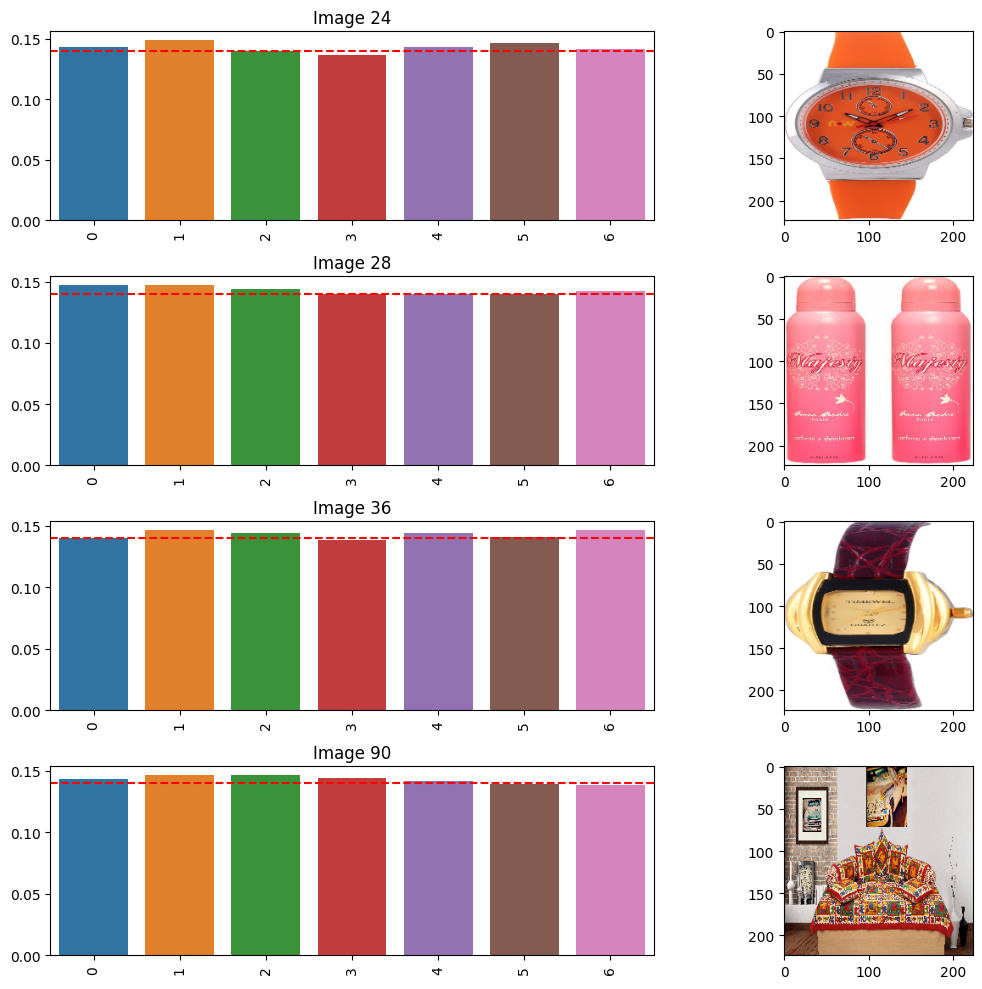

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_prediction(image_index, title):
    ex_prediction_vgg = vgg_transfer.predict(redim(test_array_cnn[image_index], 224, 224).reshape(1, 224, 224, 3))
    plt.title(title)
    sns.barplot(x=list(range(ex_prediction_vgg.shape[1])), y=ex_prediction_vgg[0])
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

    # Agregar una línea roja horizontal en el eje y cuando es igual a 0.14
    plt.axhline(y=0.14, color='red', linestyle='--')

# Crear un subplot de 4x2 con dos columnas
fig, axs = plt.subplots(4, 2, figsize=(12,10))

images = [24, 28, 36, 90]
titles = ['Image 24', 'Image 28', 'Image 36', 'Image 90']

for i, image_index in enumerate(images):
    # Usar el array de Axes para acceder al subplot correspondiente
    # Primera columna: gráfica de barras
    plt.sca(axs[i, 0])
    plot_prediction(image_index, titles[i])
    # Segunda columna: imagen
    plt.sca(axs[i, 1])
    plt.imshow(test_array_cnn[image_index])  # Mostrar la imagen

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el subplot
plt.show()


In [39]:
# Regrouper et compter les catégories de premier niveau
categories_premier_niveau = data['cat_lvl_1'].value_counts()

# Obtenir le nombre de catégories de premier niveau
nombre_categories_premier_niveau = len(categories_premier_niveau)

# Afficher le résultat
print("Nombre de catégories de premier niveau :", nombre_categories_premier_niveau)
print("Catégories de premier niveau et leur compte :")
print(categories_premier_niveau)


Nombre de catégories de premier niveau : 7
Catégories de premier niveau et leur compte :
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_lvl_1, dtype: int64


In [40]:
#Attention processeur à 100% pendant 3 min
vgg_train_output = vgg_transfer.predict(train_array_cnn)
vgg_test_output = vgg_transfer.predict(test_array_cnn)

9/9 [==============================] - 27s 3s/step


In [41]:
vgg_train_output.shape

(787, 7)

In [42]:
vgg_test_output.shape

(263, 7)

In [43]:
vgg_output = np.vstack([vgg_train_output, vgg_test_output])

In [44]:
vgg_output.shape

(1050, 7)

In [45]:
np.save('data_saved_transfer_learning_output', vgg_output)

<div class="alert alert-info">
    <font id="section_2">
    <h1 style="font-size:25px;"><strong>2.0 Approche combinée NLP</strong></h1>
</div>

In [46]:
X_NLP = np.load('X_reduce_NLP.csv.npy')
X_descripteurs = np.load('array_features_descripteurs.npy')
X_CNN = np.load('data_saved_transfer_learning_output.npy')

In [47]:
X_NLP.shape

(1050, 340)

In [48]:
np.vstack([np.array(train['discounted_price']).reshape(-1,1),
           np.array(test['discounted_price']).reshape(-1,1)])

array([[  349.],
       [ 5436.],
       [13500.],
       ...,
       [  356.],
       [  550.],
       [  950.]])

In [49]:
np.array(data['discounted_price']).reshape(-1,1).shape[1]

1

<div class="alert alert-info">
    <font id="section_2_1">
    <h1 style="font-size:25px;"><strong>2.1 Homogénisation des dimensions</strong></h1>
</div>

In [50]:
print('Tableau données textuelles NLP : ', X_NLP.shape)
print('Nouvelles features Descripteurs: Descripteurs : ', X_descripteurs.T.shape)
print('Réseau de neurone Imagenet :CNN : ', X_CNN.shape)

Tableau données textuelles NLP :  (1050, 340)
Nouvelles features Descripteurs: Descripteurs :  (1050, 6)
Réseau de neurone Imagenet :CNN :  (1050, 7)


<div class="alert alert-info">
    <font id="section_2_2">
    <h1 style="font-size:25px;"><strong>2.2 Assemblage des données</strong></h1>
</div>

In [50]:
X_combined = np.hstack([np.array(data['discounted_price']).reshape(-1,1), 
           X_NLP,
           X_CNN, 
           X_descripteurs.T])

In [51]:
X_combined.shape

(1050, 354)

In [52]:
np.nan_to_num(X_combined, 0)

array([[ 8.99000000e+02, -9.29207686e-01, -4.08960531e-01, ...,
         1.32805891e-02,  3.66636226e-03,  1.73427246e-03],
       [ 4.49000000e+02, -1.99557548e+00, -7.97962524e-01, ...,
         1.31869493e-02,  2.96746241e-03,  1.38368679e-03],
       [ 0.00000000e+00, -2.00294510e+00, -7.56956153e-01, ...,
         1.37783727e-02,  4.30302089e-03,  1.99314393e-03],
       ...,
       [ 1.44900000e+03, -1.52960145e+00, -5.13532247e-01, ...,
         1.27576049e-02,  3.04677919e-03,  1.23298261e-03],
       [ 1.33300000e+03, -2.03952771e+00, -6.93763840e-01, ...,
         1.30402548e-02,  3.86178237e-03,  1.83426682e-03],
       [ 5.95000000e+02, -2.06888935e+00, -7.55835654e-01, ...,
         1.29538495e-02,  3.89470346e-03,  1.89778244e-03]])

In [53]:
np.save('data_saved_X_combined', X_combined)

In [54]:
X_combined = np.load('data_saved_X_combined.npy')

<div class="alert alert-info">
    <font id="section_2_3">
    <h1 style="font-size:25px;"><strong>2.3 Catégorisation</strong></h1>
</div>

In [55]:
dict_kmeans = {}
inertia = {}
max_clusters=80

f = IntProgress(min=0, max=max_clusters) # instantiate the bar
g = Text(value='')
display(f) # display the bar
display(g)

for k in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=k,
                   verbose=0,
                   random_state=0,
                   ).fit(X_combined)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k)+'/'+str(max_clusters)

IntProgress(value=0, max=80)

Text(value='')

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


<AxesSubplot:title={'center':'Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters'}>

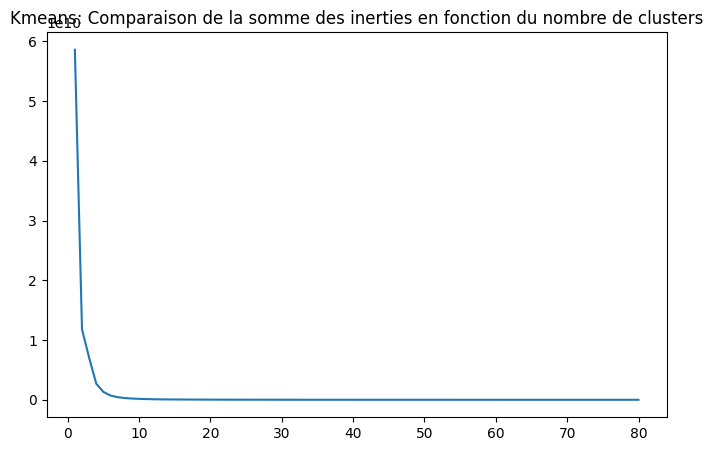

In [56]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(x = list(inertia.keys()),
             y = list(inertia.values())
            )

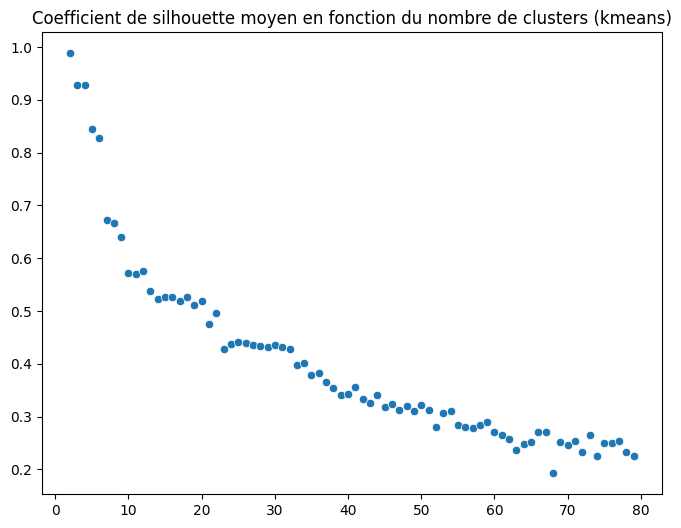

In [57]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_combined,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [58]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

le coefficient de silhouette est maximal pour 2 clusters (score = 0.988281020625394)


C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


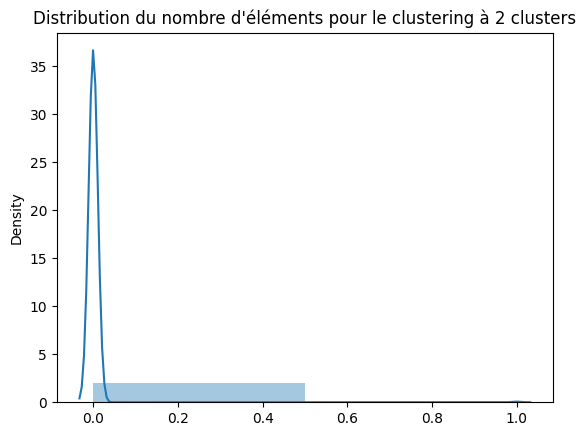

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


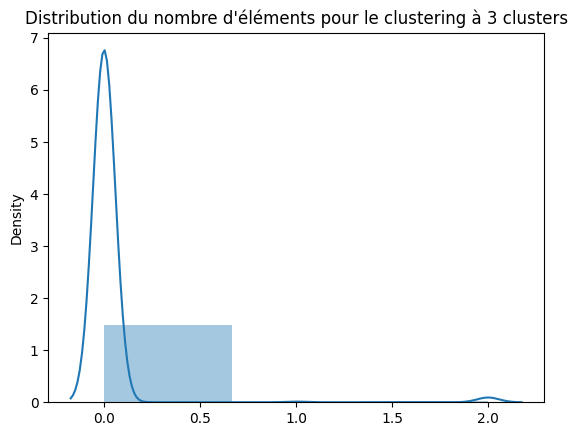

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


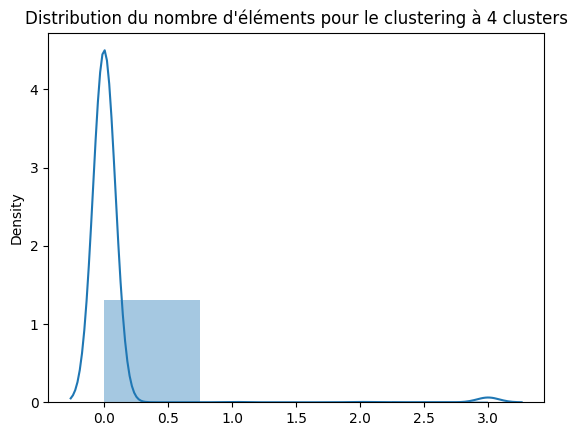

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


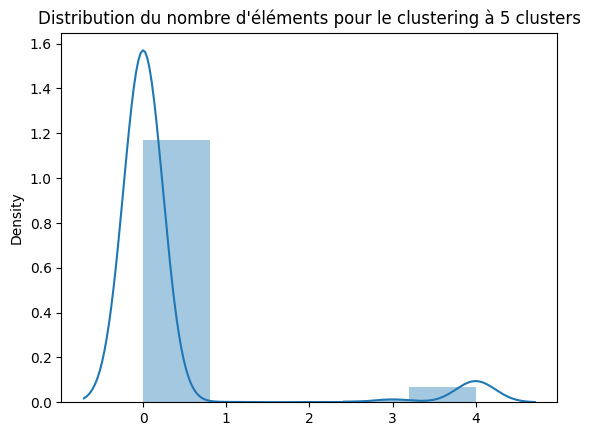

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


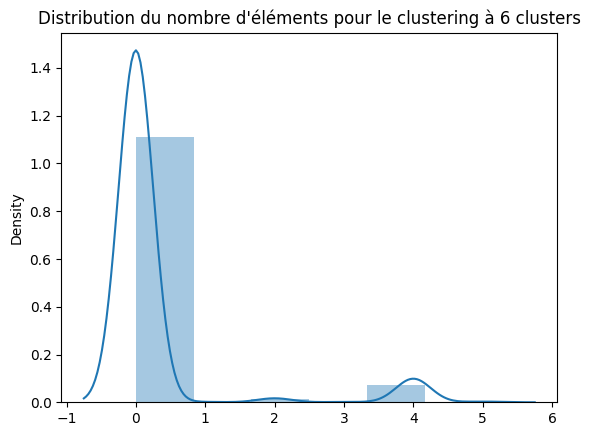

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


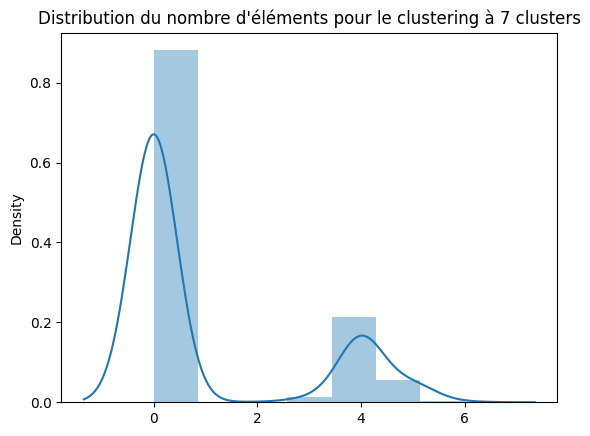

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


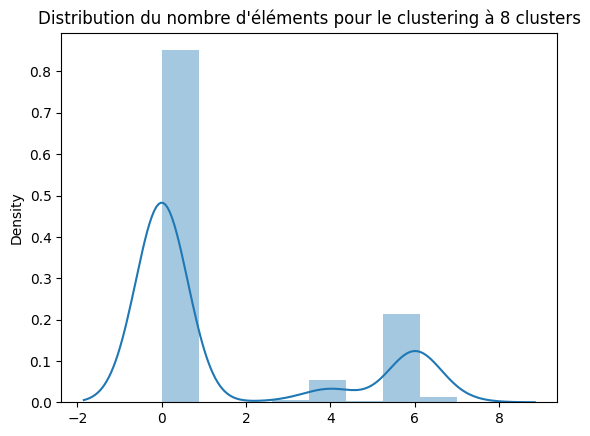

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


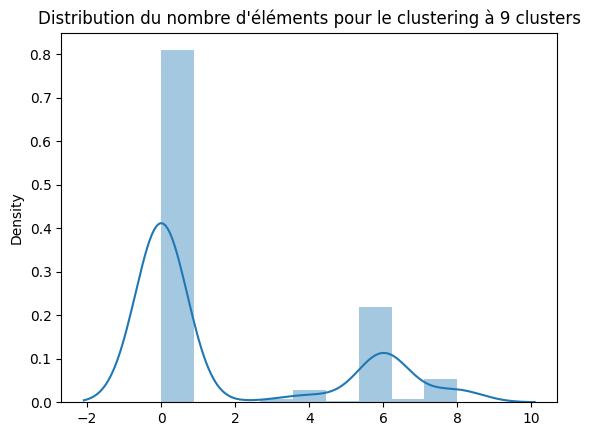

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


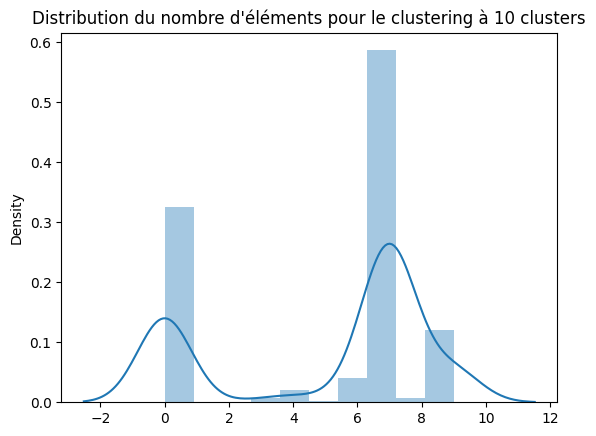

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


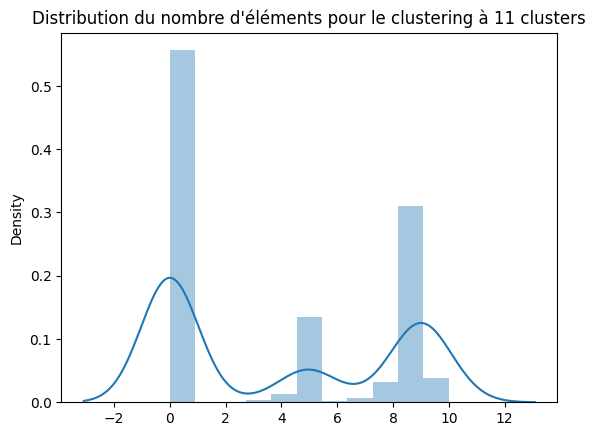

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


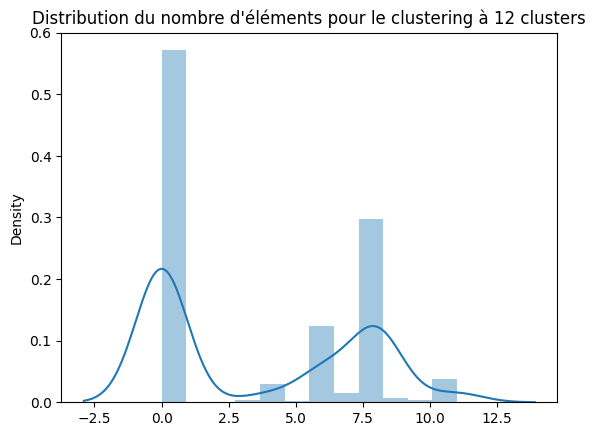

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


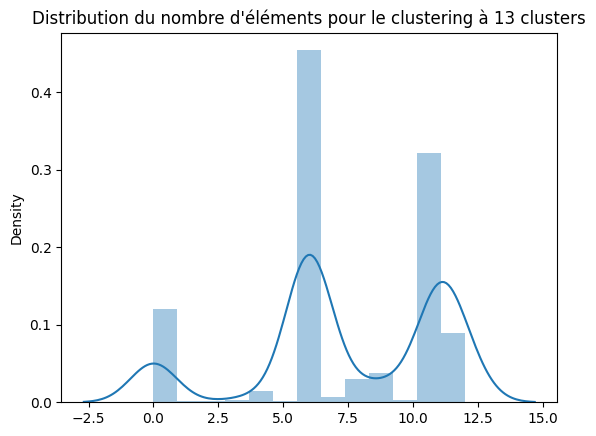

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


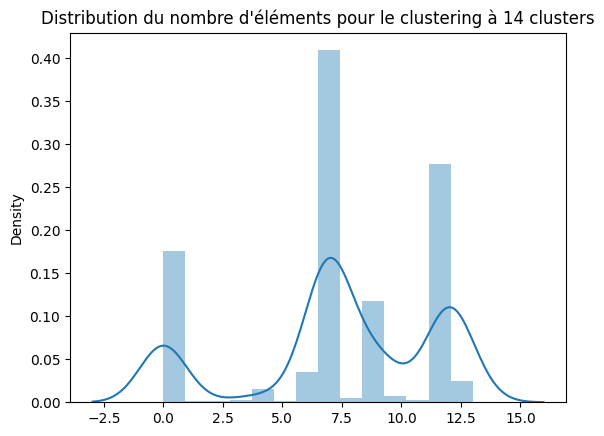

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


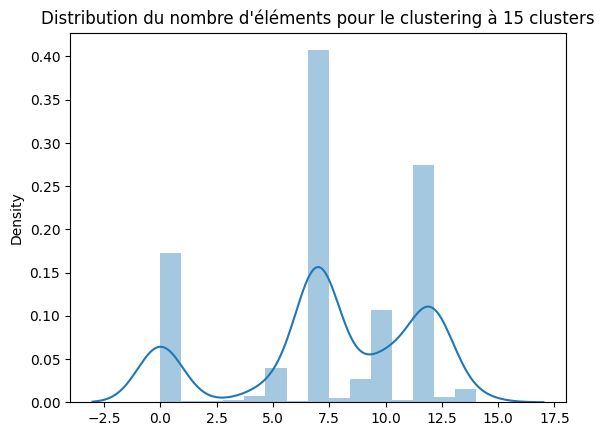

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


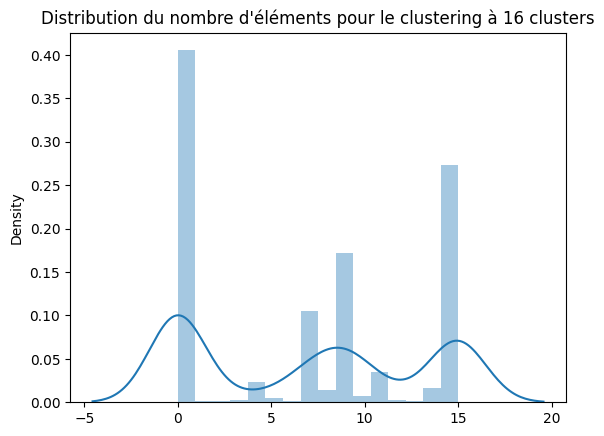

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


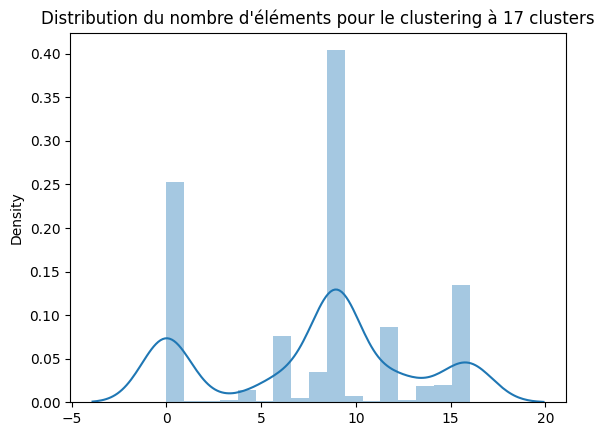

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


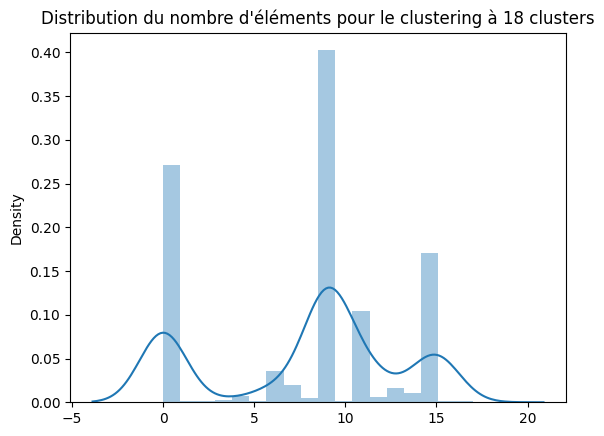

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


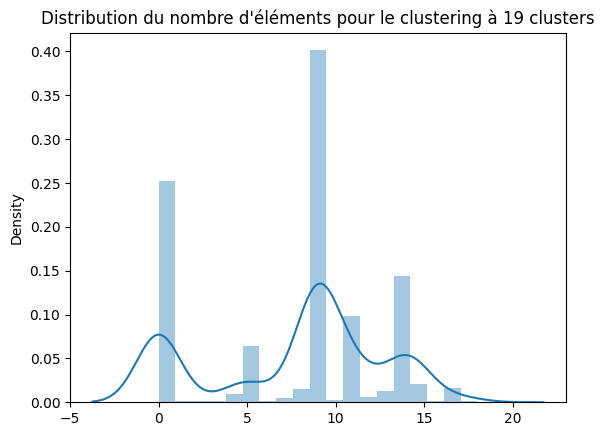

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


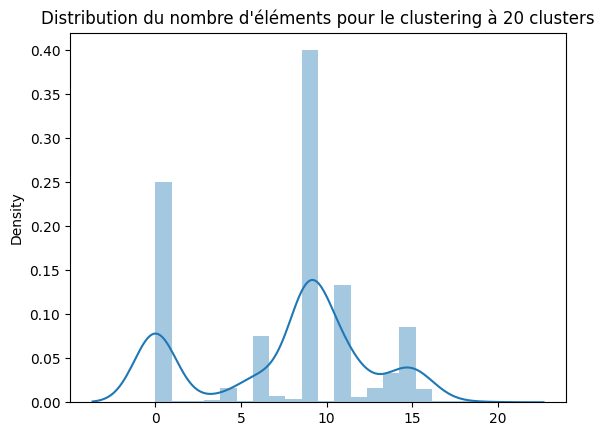

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


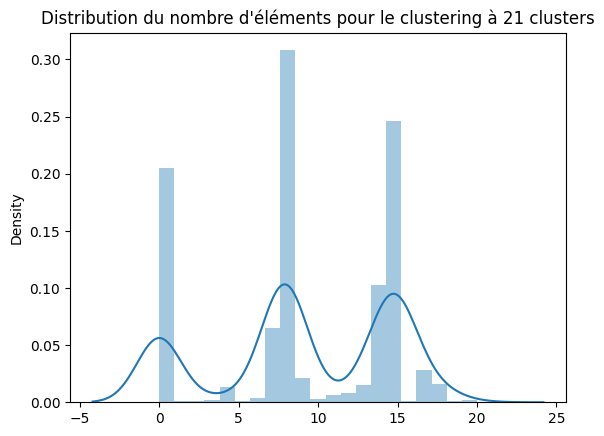

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


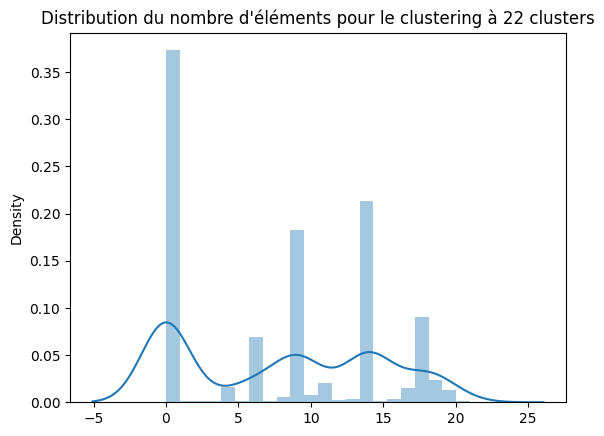

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


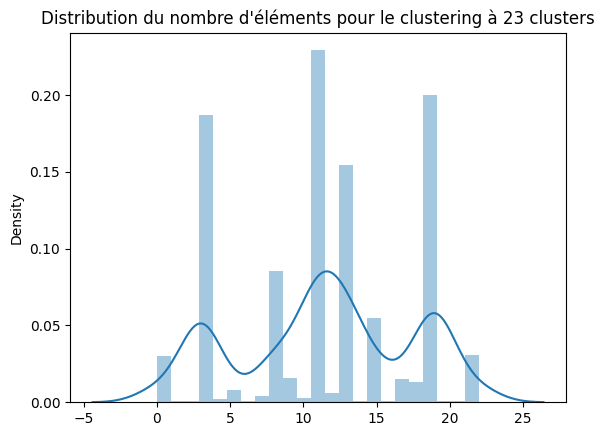

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


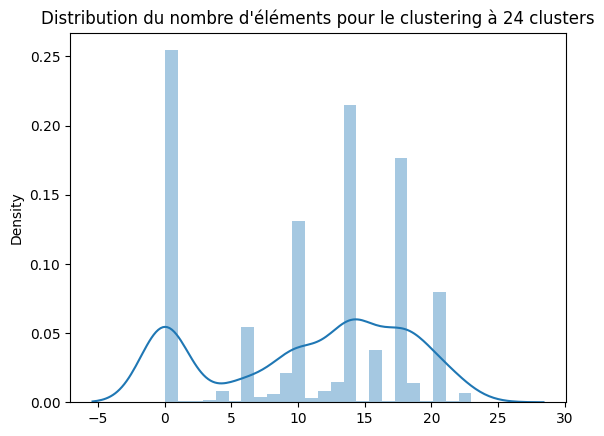

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


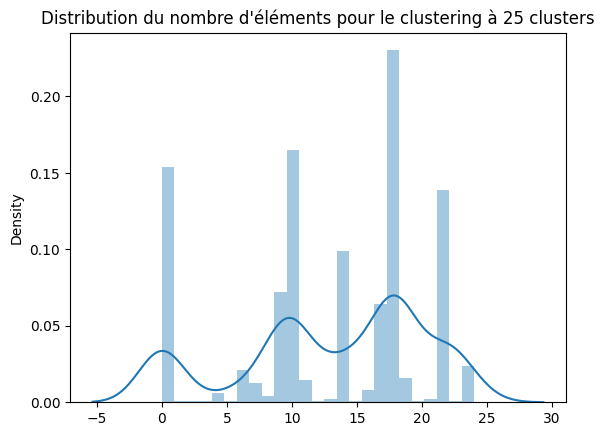

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


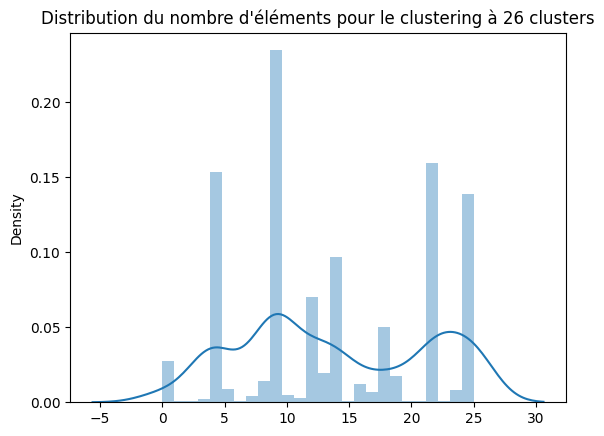

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


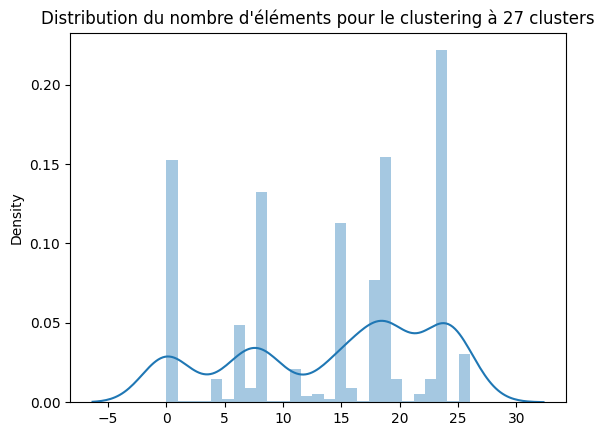

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


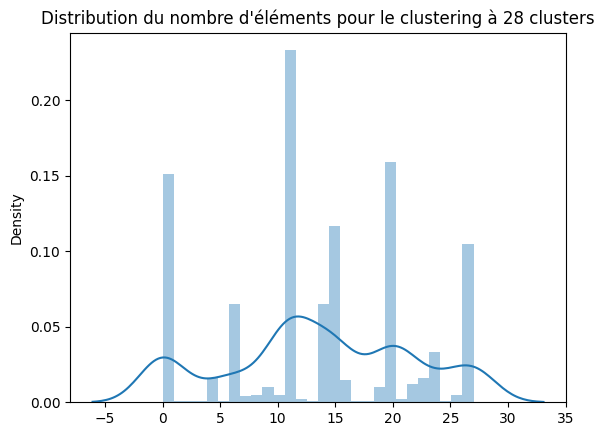

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


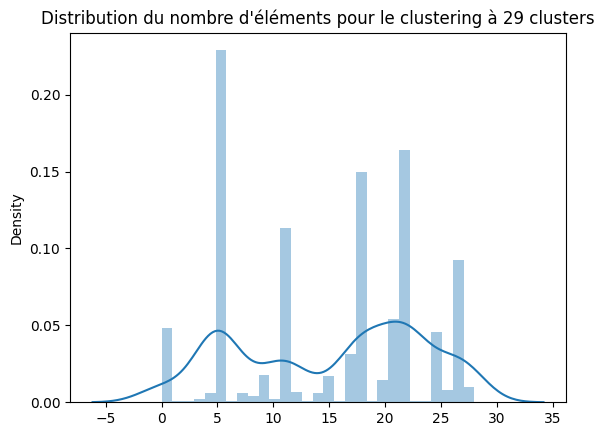

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


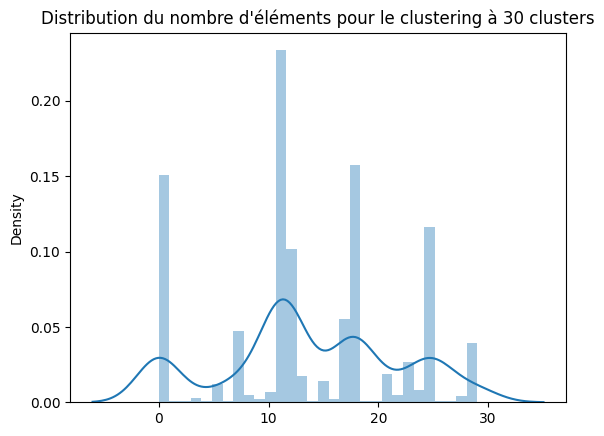

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


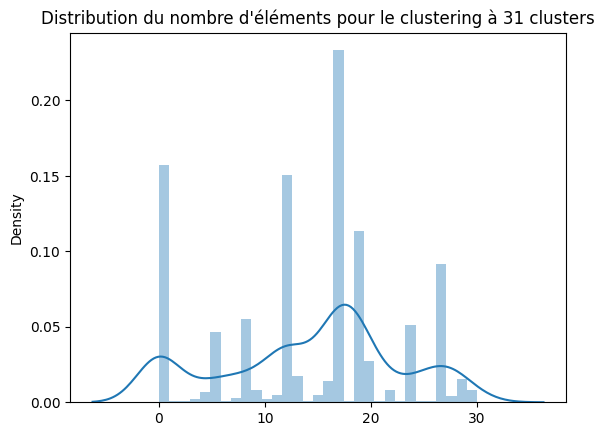

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


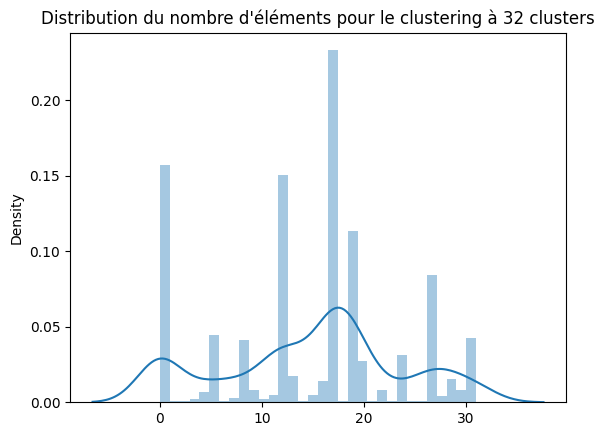

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


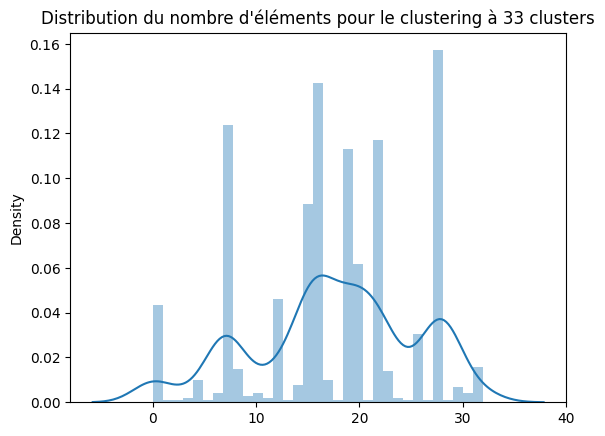

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


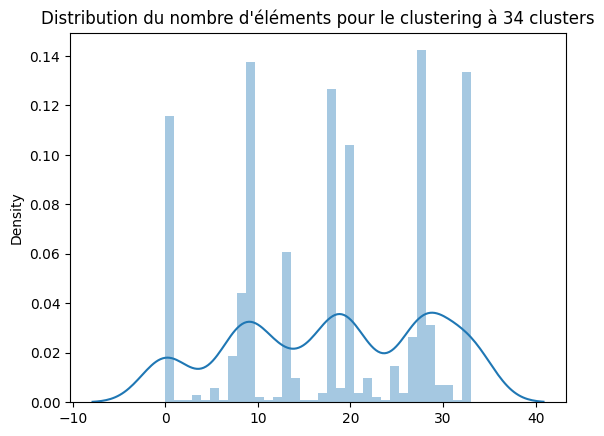

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


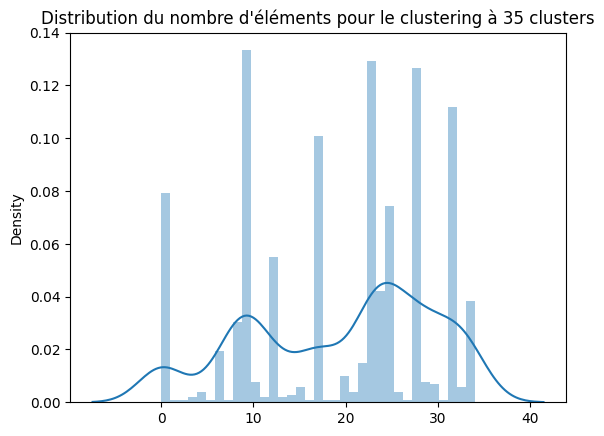

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


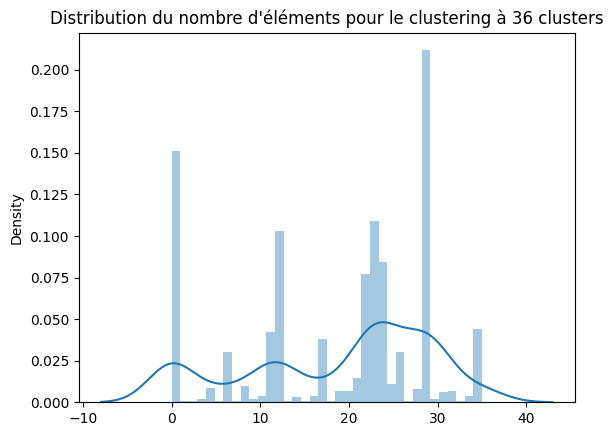

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


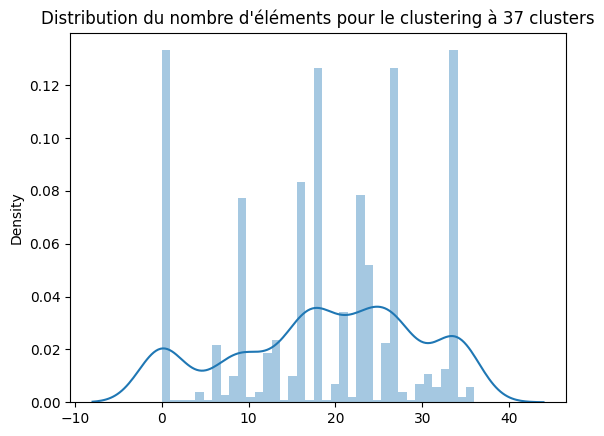

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


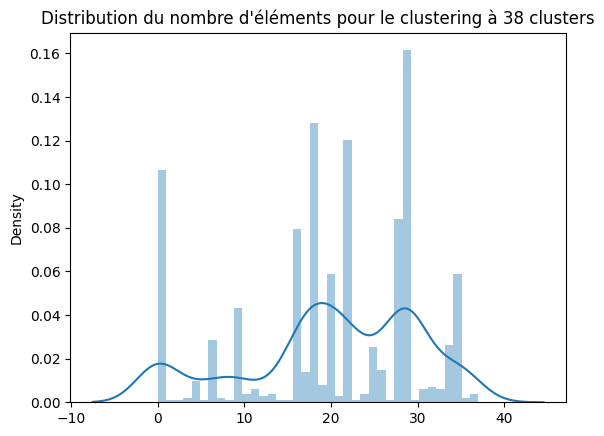

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


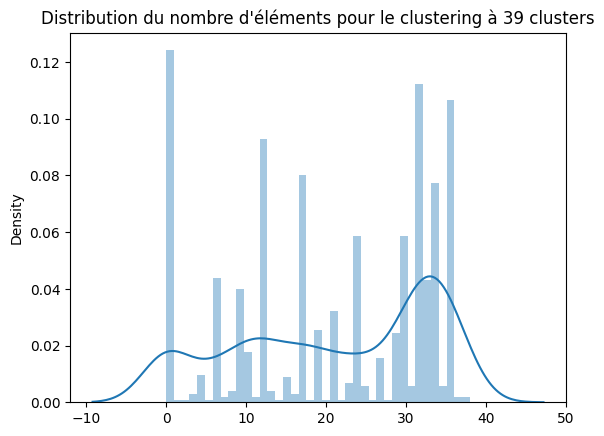

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


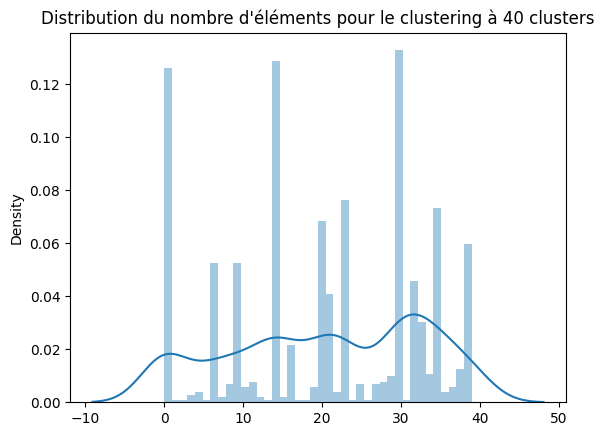

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


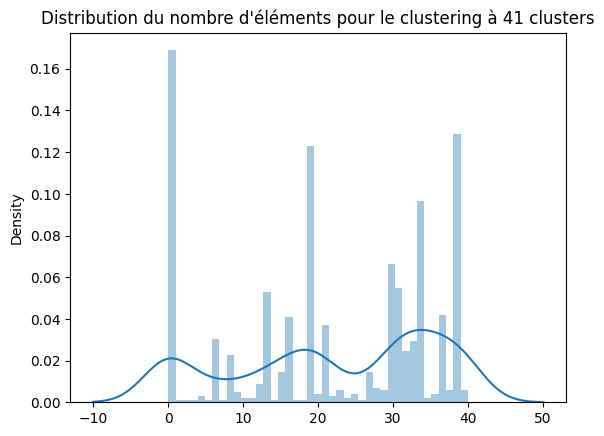

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


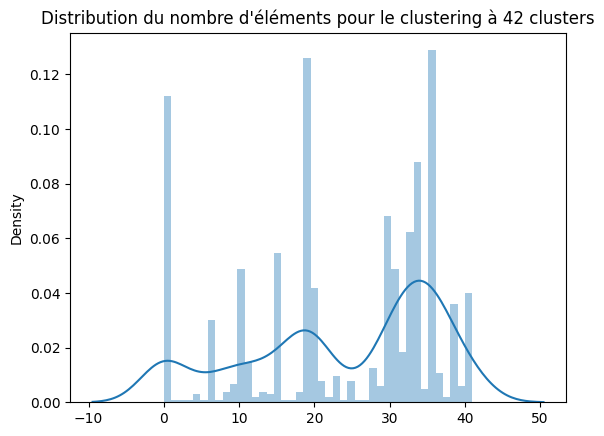

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


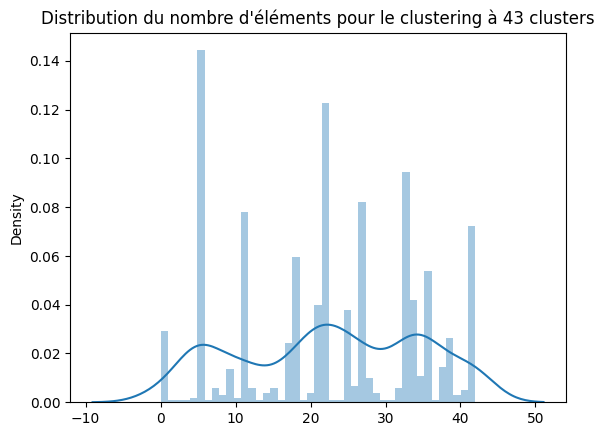

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


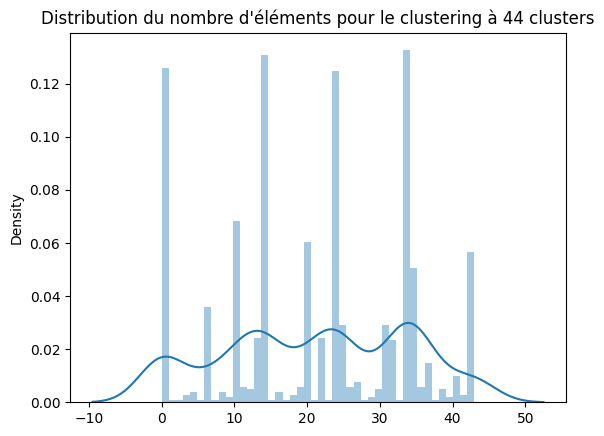

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


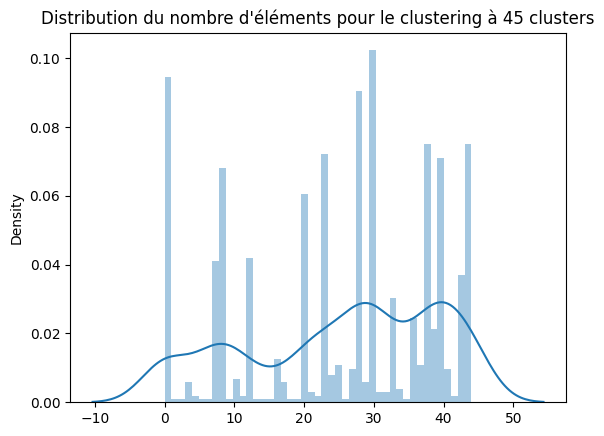

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


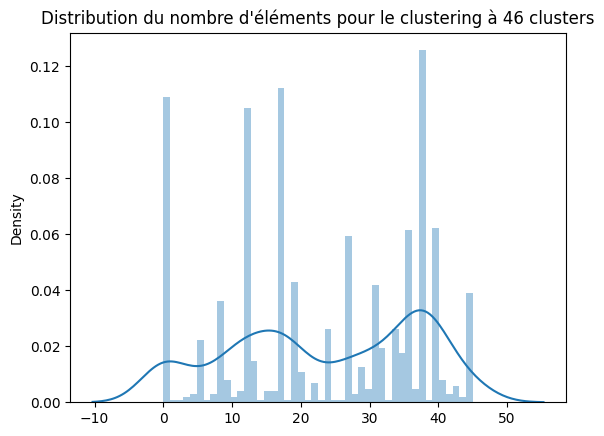

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


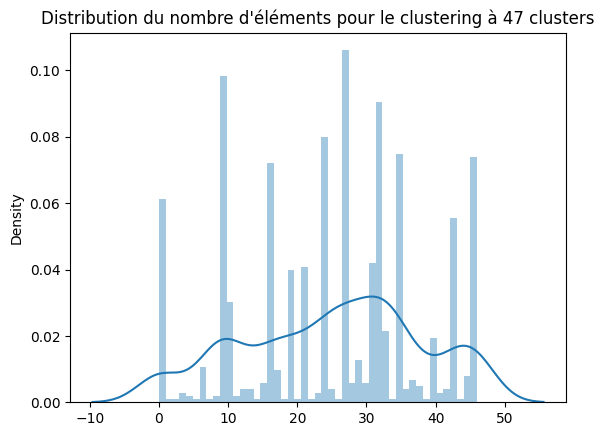

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


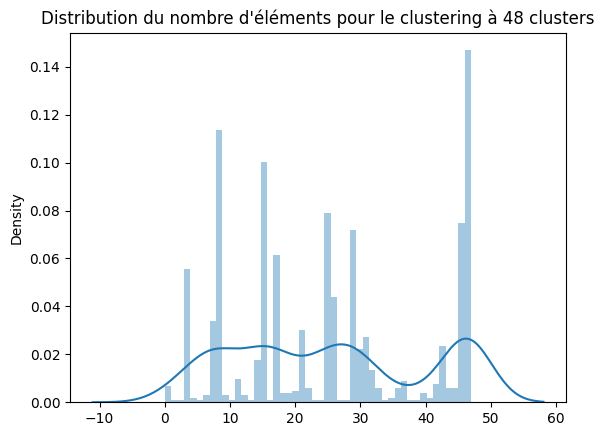

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


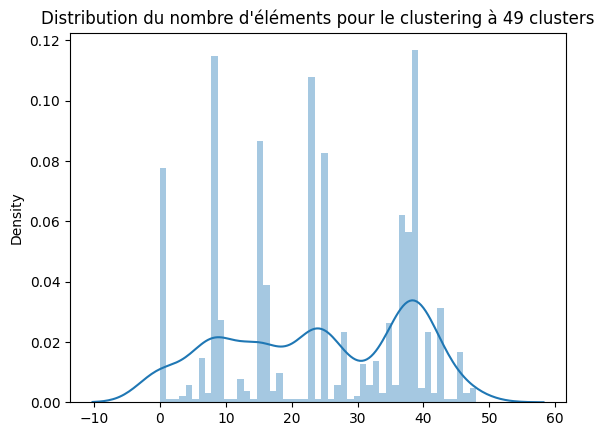

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


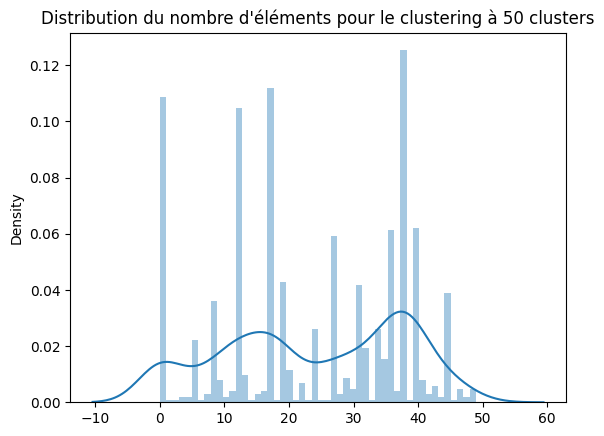

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


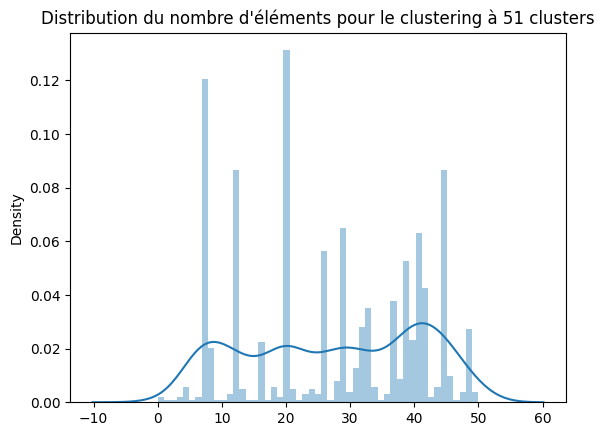

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


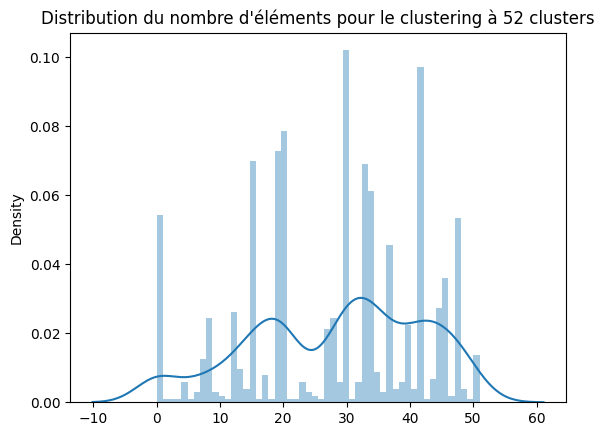

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


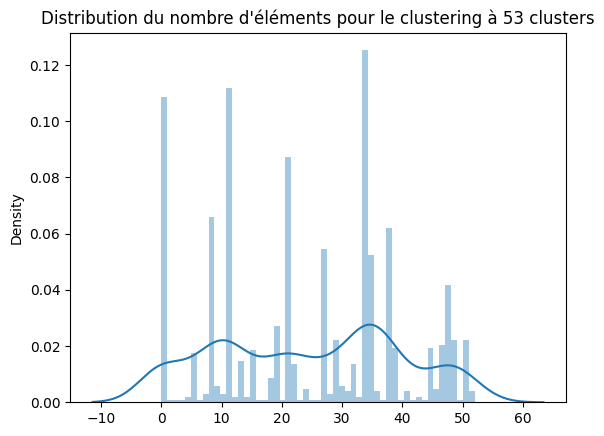

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


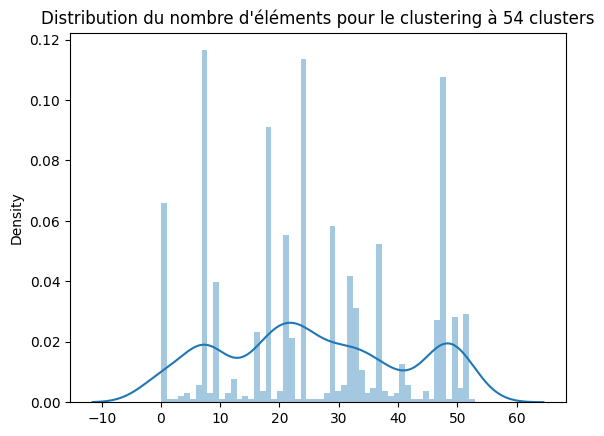

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


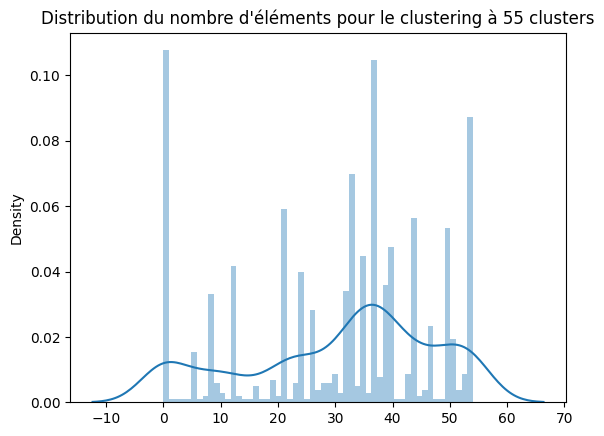

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


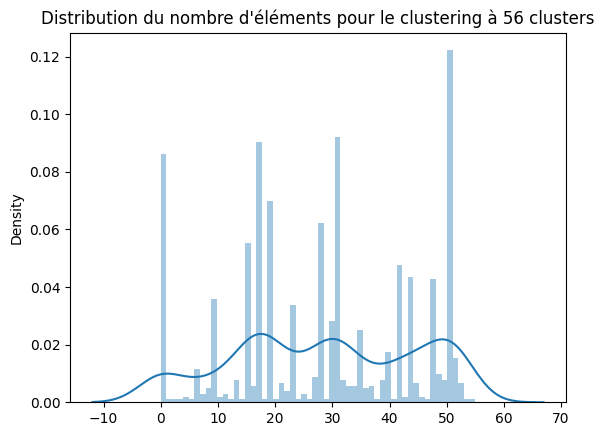

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


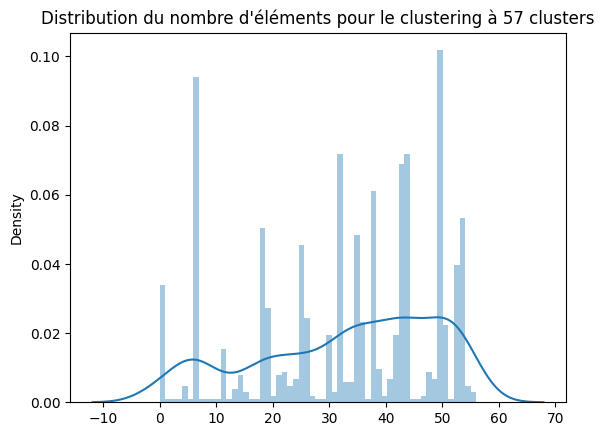

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


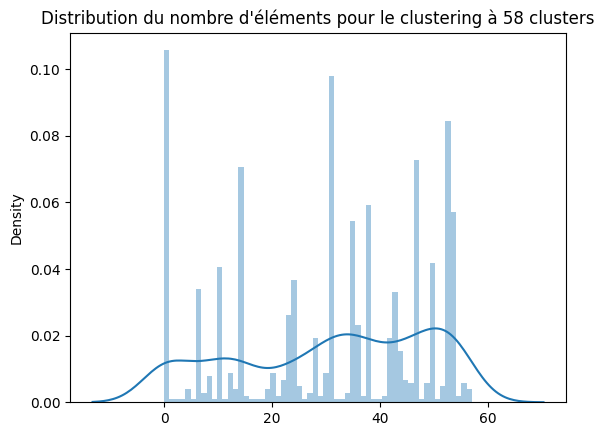

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


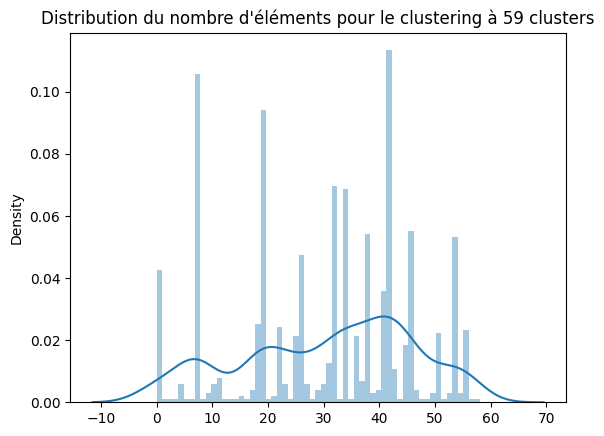

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


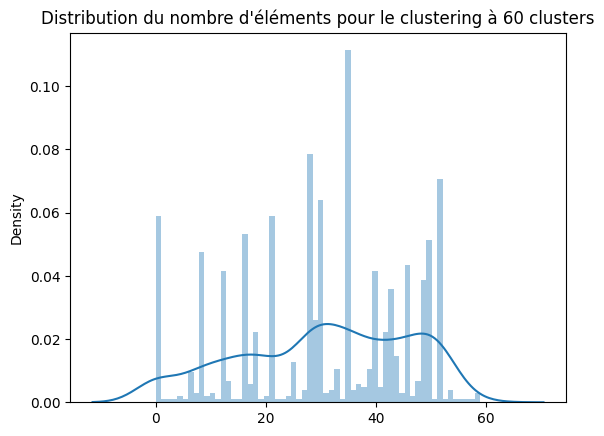

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


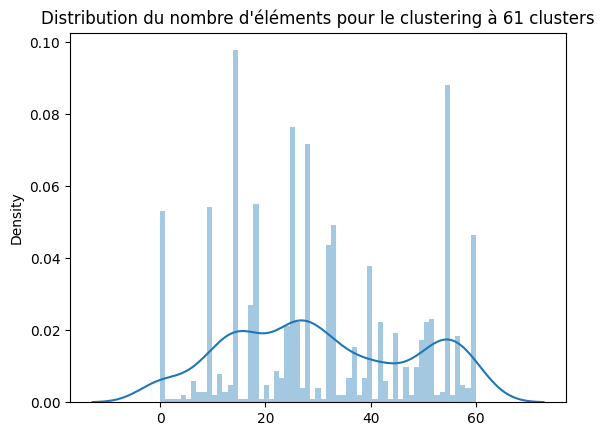

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


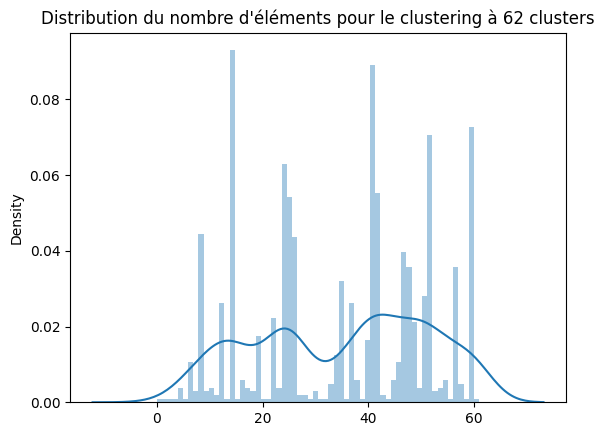

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


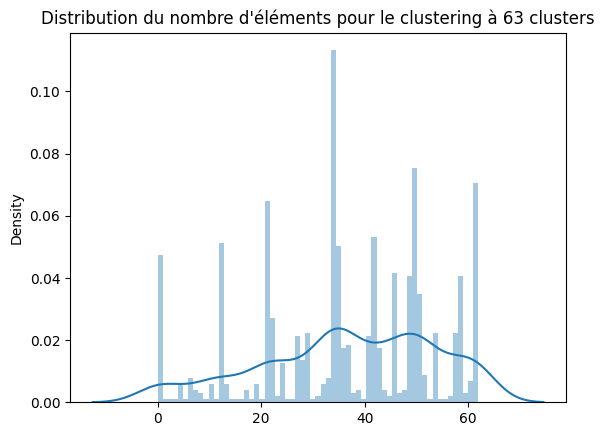

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


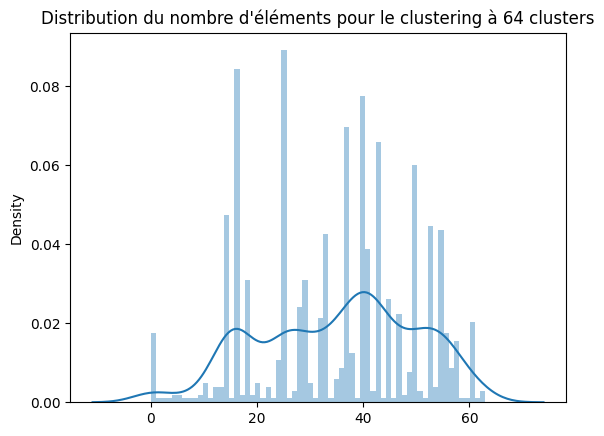

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


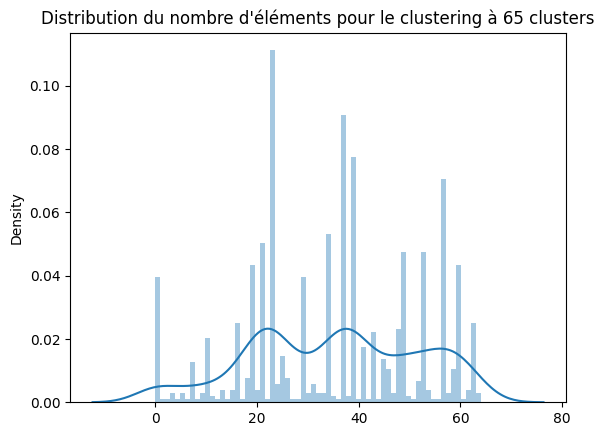

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


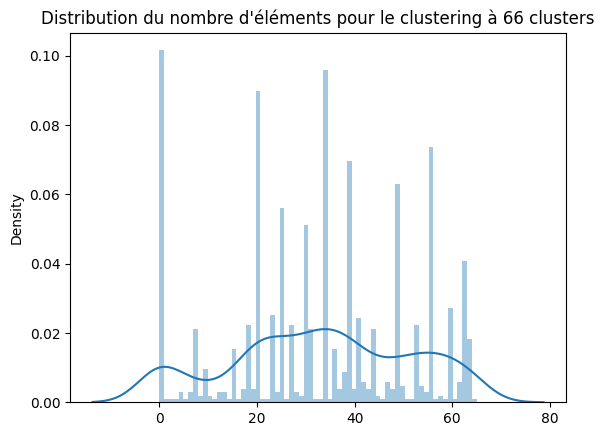

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


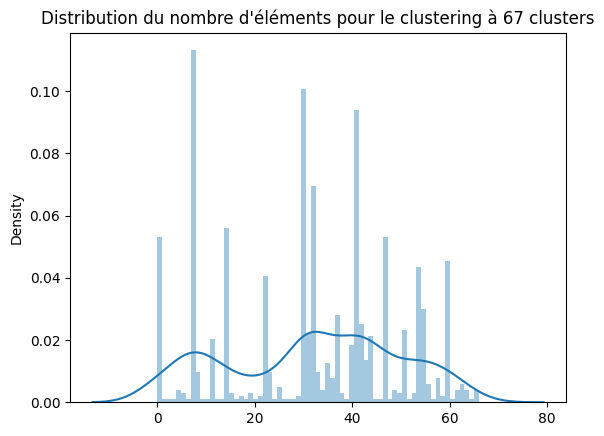

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


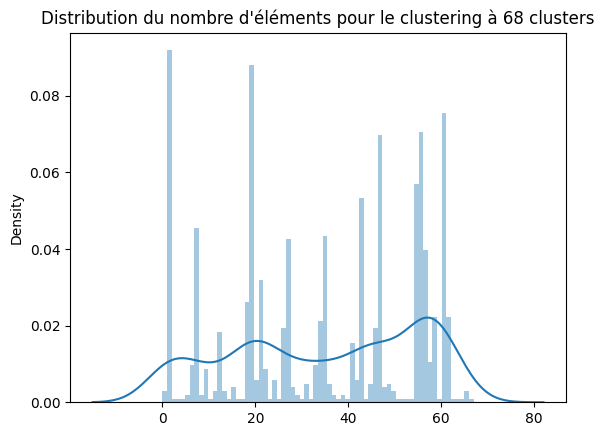

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


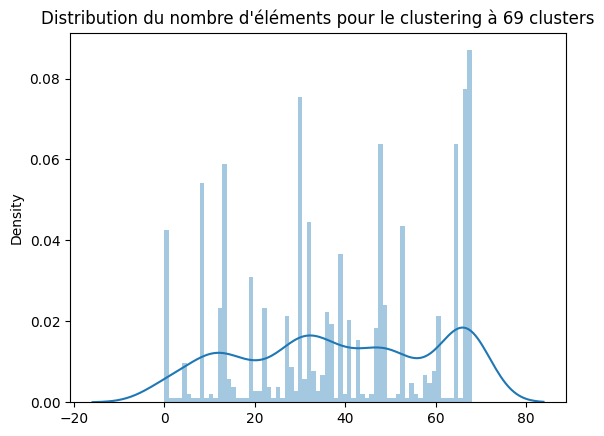

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


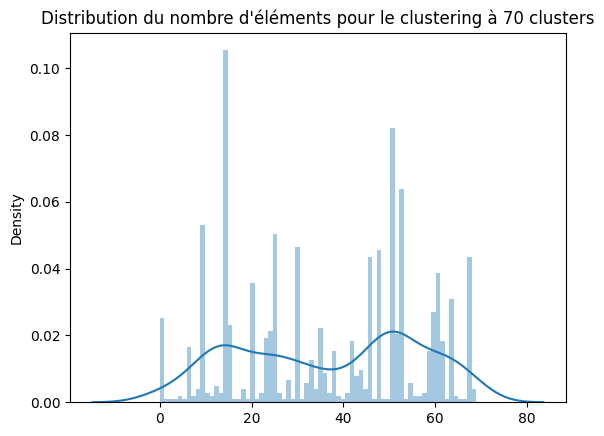

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


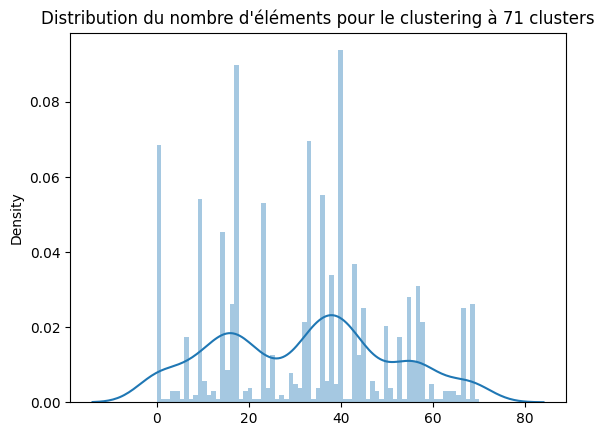

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


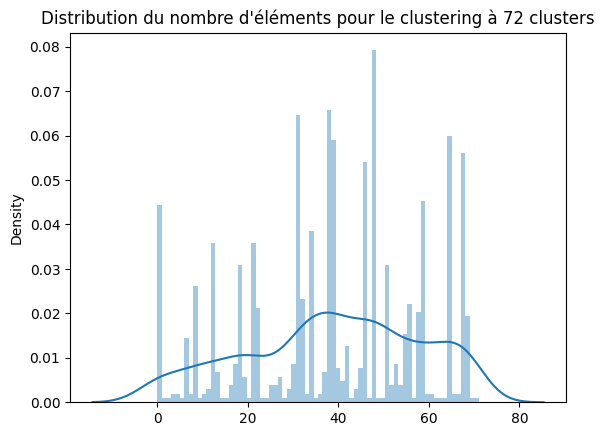

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


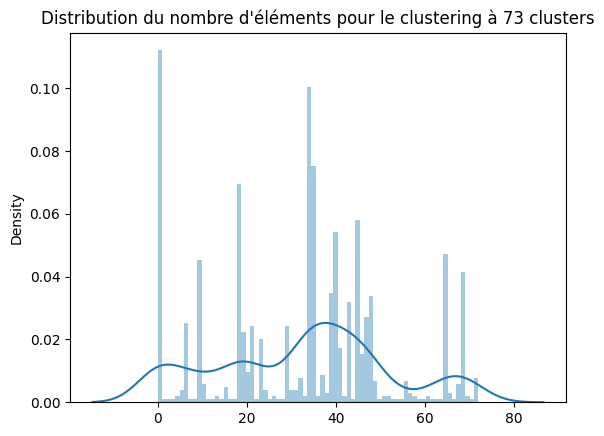

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


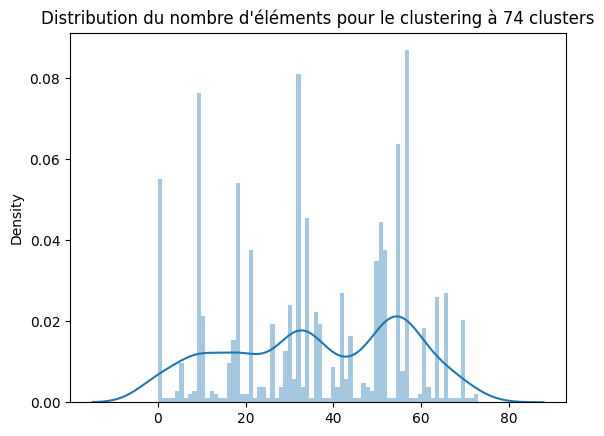

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


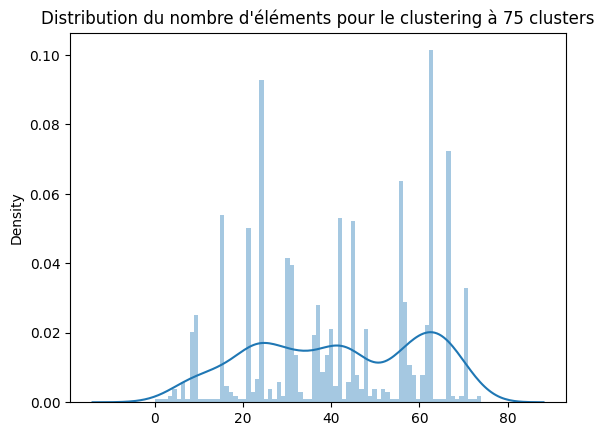

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


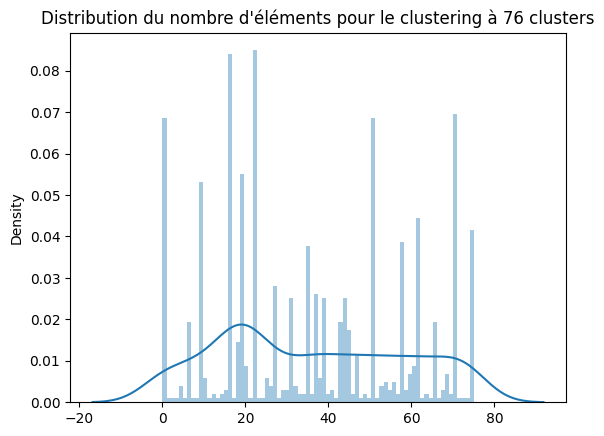

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


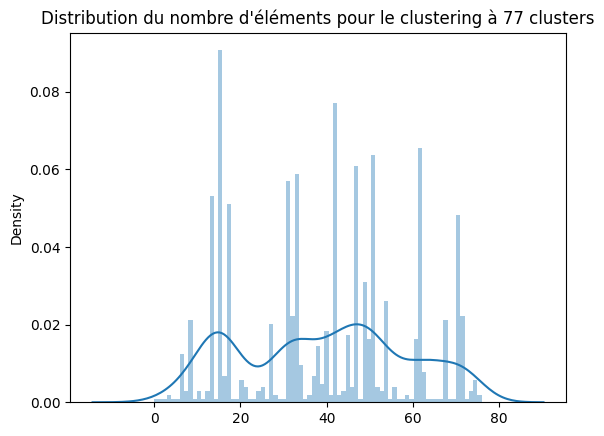

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


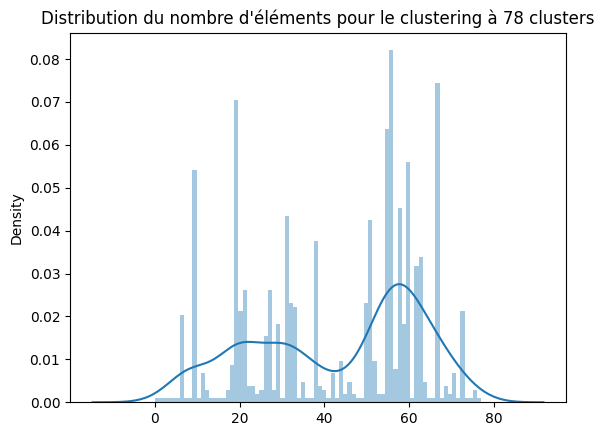

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


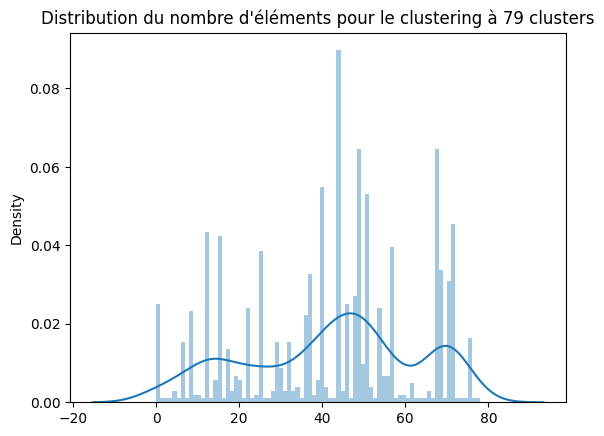

In [59]:
%matplotlib inline
for i in range(2,max_clusters):
    plt.figure()
    titre = 'Distribution du nombre d\'éléments pour le clustering à '+ str(i)+ ' clusters'
    plt.title(titre)
    sns.distplot(dict_kmeans[i].labels_, bins=i)
    plt.show()

In [60]:
jeu_categoriel = pd.DataFrame(X_NLP)
jeu_categoriel['label'] = dict_kmeans[10].labels_

In [61]:
jeu_categoriel.to_csv('data_saved_jeu_complet_kmeans.csv')

In [62]:
jeu_categoriel.shape

(1050, 341)

<div class="alert alert-info">
    <font id="section_3">
    <h1 style="font-size:25px;"><strong>3.0 Représentation des données</strong></h1>
</div>

### Représenter graphiquement des données à grandes dimensions.

* **CE1** Vous avez mis en œuvre au moins une technique de réduction de dimension (via LDA, ACP, T-SNE, UMAP ou autre technique).
* **CE2** Vous avez réalisé au moins un graphique représentant les données réduites en 2D (par exemple affichage des 2 composantes du T-SNE).
* **CE3** Vous avez réalisé et formalisé une analyse du graphique en 2D.


In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_combined.copy())

C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\oscar\OneDrive\Documents\DataScientist\envs\Projet6\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

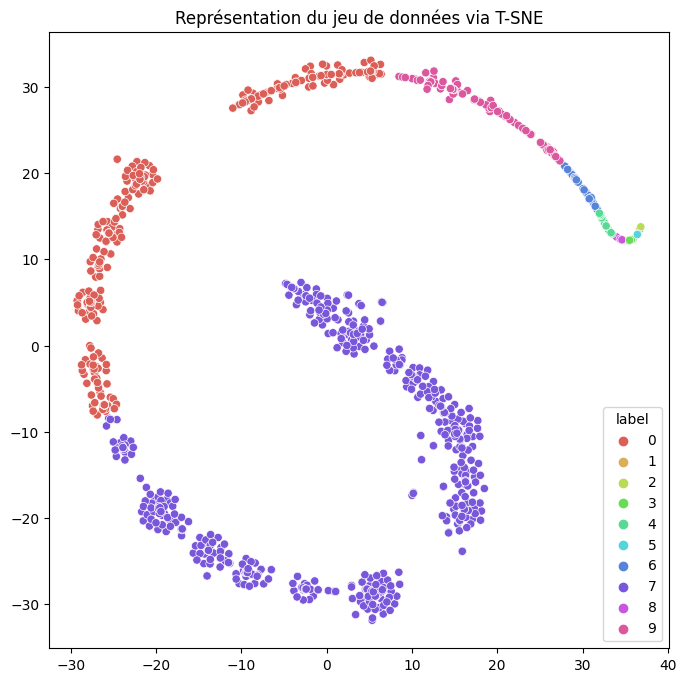

In [64]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
palette_sns = sns.color_palette("hls", jeu_categoriel['label'].nunique())
sns.scatterplot(x= T[:,0], 
                y= T[:,1], 
                hue= jeu_categoriel['label'], 
                palette= palette_sns)

In [65]:
T.shape

(1050, 2)

In [66]:
X_combined.shape

(1050, 354)

In [67]:
data_final = pd.concat([train, test])
data_final['X_TSNE'] = T[:,0]
data_final['Y_TSNE'] = T[:,1]

data_final.set_index('Unnamed: 0', inplace=True)

In [68]:
data_final['label'] = jeu_categoriel['label'].tolist()

In [69]:
data_final.shape

(1050, 20)

In [70]:
data_final.to_csv('data_saved_data_final.csv')

In [71]:
data_final.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,X_TSNE,Y_TSNE,label
0,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-cats-ceramic-mug/p/itmeaggkyugvu...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,Images/785b4383b12106dd172306d427d8f7b2.jpg,False,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r\n Pri...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Cap...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs,-25.77014,13.41308,0
1,45d0af2c709de47268c80c35a117de44,2015-12-01 12:40:44 +0000,http://www.flipkart.com/malhar-niko-male-doll-showpiece-25-cm/p/itmey382drsj...,Malhar Niko Male Doll Showpiece - 25 cm,SHIEY382SR75SXEY,6395.0,5436.0,Images/45d0af2c709de47268c80c35a117de44.jpg,True,Buy Malhar Niko Male Doll Showpiece - 25 cm for Rs.5436 online. Malhar Nik...,No rating available,No rating available,Malhar,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Malhar""}, {""key""=>""Mod...",Home Decor & Festive Needs,Showpieces,Malhar Showpieces,-1.57395,-29.03675,7
2,64b463dc0b75ae40a848498c657041e6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/linksys-smart-wi-fi-router/p/itmdztfckpushzkd?pid=RT...,Linksys Smart Wi-Fi Router,RTRDZTF9DBT4CW8U,14999.0,13500.0,Images/64b463dc0b75ae40a848498c657041e6.jpg,True,Buy Linksys Smart Wi-Fi Router only for Rs. 0.0 from Flipkart.com. Only Genu...,No rating available,No rating available,Linksys,"{""product_specification""=>[{""key""=>""Encryption"", ""value""=>""WPA2""}, {""key""=>""...",Computers,Network Components,Routers,-4.80632,7.20033,7
3,6b5cdfe68595fbcab0e05dc625d3d66a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/richfeel-sunshield-spf-30-pa/p/itme4f2gmrzc86hr?pid=...,Richfeel Sunshield - SPF 30 PA++,SNRE4F2GBWVF6UKR,299.0,224.0,Images/6b5cdfe68595fbcab0e05dc625d3d66a.jpg,False,Flipkart.com: Buy Richfeel Sunshield - SPF 30 PA++ for Rs. 269 from Flipkart...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"", ""value""=>""100 g""}, {""key""=>""S...",Beauty and Personal Care,Body and Skin Care,Face Care,-1.66827,31.00606,0
4,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-usb/p/itmeb3fdtgzcq3ff?pid=USGEB...,Epresent Mfan 1 Fan USB USB Fan,USGEB3HTYWCYT2HY,269.0,219.0,Images/e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan U...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Epresent""}, {""key""=>""T...",Computers,Laptop Accessories,USB Gadgets,-26.03778,-6.95747,0


<div class="alert alert-info">
    <font id="section_4">
    <h1 style="font-size:25px;"><strong>4.0 Liens importants</strong></h1>
</div>

* <a href="https://openclassrooms.com/fr/paths/164/projects/631/assignment" target="_blank">Lien vers consignes : </a>

* <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv" target="_blank">Kaggle Brazilian E-Commerce Public Dataset by Olist: </a>

* <a href="https://olist.com/pt-br/" target="_blank">Lien vers Olist: </a>

* Notebooks consultés
* 1. <a href="https://www.kaggle.com/code/mohamedtrabis/p5-01-notebookanalyse" target="_blank">Kaggle Notebook 1  : </a>
* 2. <a href="https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering" target="_blank">Kaggle Notebook 2  : </a>




Ressources : https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

In [72]:
#Enregistrer le temps de fin
fin = time.time()

In [73]:
#Calculer la durée en minutes
durée = (fin - début) / 60

In [74]:
#Afficher le temps d'exécution
print("Le temps d'exécution était de", durée, "minutes.")

Le temps d'exécution était de 7.1507188757260645 minutes.


In [75]:
import sys
import pandas as pd

def liberar_memoria():
    # Obtenir les noms des variables globales
    noms_objets = [nom for nom in globals() if not nom.startswith('_') and nom not in sys.modules]

    # Exclure les variables internes d'IPython
    variables_ipython = set(['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars'])
    noms_objets = [nom for nom in noms_objets if nom not in variables_ipython]

    # Libérer la mémoire en supprimant les objets
    for nom in noms_objets:
        del globals()[nom]

    # Collecter les déchets pour libérer la mémoire allouée
    import gc
    gc.collect()

    # Afficher un message indiquant que la mémoire a été libérée
    print("Mémoire libérée.")

# Exécuter la routine pour libérer la mémoire
liberar_memoria()


Mémoire libérée.


In [76]:
import winsound

def finalizar_tarea():
    # Realizar tarea aquí
    
    # Reproducir señal sonora al finalizar la tarea
    frequency = 2500  # Frecuencia del sonido en Hz
    duration = 1000  # Duración del sonido en milisegundos
    winsound.Beep(frequency, duration)

finalizar_tarea()
